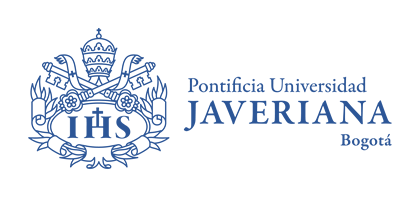

# Introducción a la IA - Proyecto

## Integrantes
- Andrés García Montoya
- Nicolás David Rincón Ballesteros
- Iván Darío Orozco

In [37]:
#pip install -r requirements.txt

# Importar librerías

In [38]:
import pandas as pd                                                # Para manipulación de datos, CSV I/O (e.g. pd.read_csv).
import numpy as np                                                 # Para álgebra linear (Operaciones de matrices).
import tensorflow as tf                                             # Para construir y entrenar modelos de aprendizaje profundo.
from tensorflow import keras                                        # Para construir y entrenar modelos de aprendizaje profundo.
from tensorflow.keras import layers                                 # Para construir y entrenar modelos de aprendizaje profundo.
import matplotlib.pyplot as plt                                    # Para visualización de datos.
import seaborn as sns                                              # Para visualización de datos.
from ucimlrepo import fetch_ucirepo                                # Para obtener datasets de UCI Machine Learning Repository.
from sklearn.preprocessing import StandardScaler                   # Para normalizar los datos.
from sklearn.model_selection import train_test_split               # Para dividir los datos en conjuntos de entrenamiento y pruebas.
from sklearn.metrics import accuracy_score, classification_report   # Para evaluar el rendimiento del modelo.

# Cargar el dataset

In [39]:
# Se cargan los datos del dataset de vinos desde un archivo CSV.
df_wine = pd.read_csv('winequality.csv')
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


# **Paso 2: Comprensión del dataset**

In [40]:
# Información general del dataset
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [41]:
# Estadísticas descriptivas del dataset
df_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Resumen

Wine Quality Dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 6497

    :Number of Attributes: 13 (12 numeric features and 1 target)

    :Attribute Information:
        - fixed_acidity
        - volatile_acidity
        - citric_acid
        - residual_sugar
        - chlorides
        - free_sulfur_dioxide
        - total_sulfur_dioxide
        - density
        - pH
        - sulphates
        - alcohol
        - quality (score between 0 and 10)
        - color (red or white)

    :Summary Statistics:

    ===================================== ======
                                           Min    Max
    ===================================== ====== ======
    fixed_acidity                          3.8    14.2
    volatile_acidity                       0.08   1.58
    citric_acid                            0.0    1.0
    residual_sugar                         0.6    65.8
    chlorides                              0.012  0.611
    free_sulfur_dioxide                    1.0    289.0
    total_sulfur_dioxide                   6.0    440.0
    density                                0.9901 1.0037
    pH                                     2.72   4.01
    sulphates                              0.22   2.0
    alcohol                                8.4    14.9
    quality                                3      9
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution:
        - Quality 0 to 6: 63 instances
        - Quality 6 to 9: 1319 instances

    :Creator: Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
    :Donor: Paulo Cortez (pcortez@ics.uminho.pt), Antonio Cerdeira, Fernando Almeida, Telmo Matos and José Reis (see also http://www3.dsi.uminho.pt/pcortez)

    :Date: March, 2009

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/Wine+Quality

.. topic:: References

   - P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
   - S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014.

# **Paso 3: pre procesamiento**

### Tratamiento de valores nulos

In [42]:
# Verificar la existencia de valores nulos (no hay)
print(df_wine.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64


No hay valores nulos en el dataset, por lo que no es necesario realizar el proceso de eliminación de valores nulos.

### Dumificación de variables categóricas

In [43]:
df_wine = pd.get_dummies(df_wine, columns=['color'])
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,True,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,True,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,True,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True,False


### Visualización de la matriz de correlación

<Axes: >

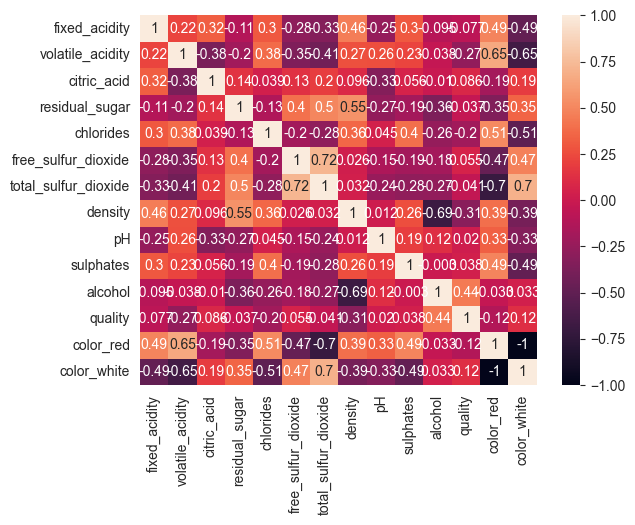

In [44]:
# Se visualiza la matriz de correlación para identificar las relaciones entre las variables.
sns.heatmap(df_wine.corr(), annot=True)

### Tratamiento de valores atípicos

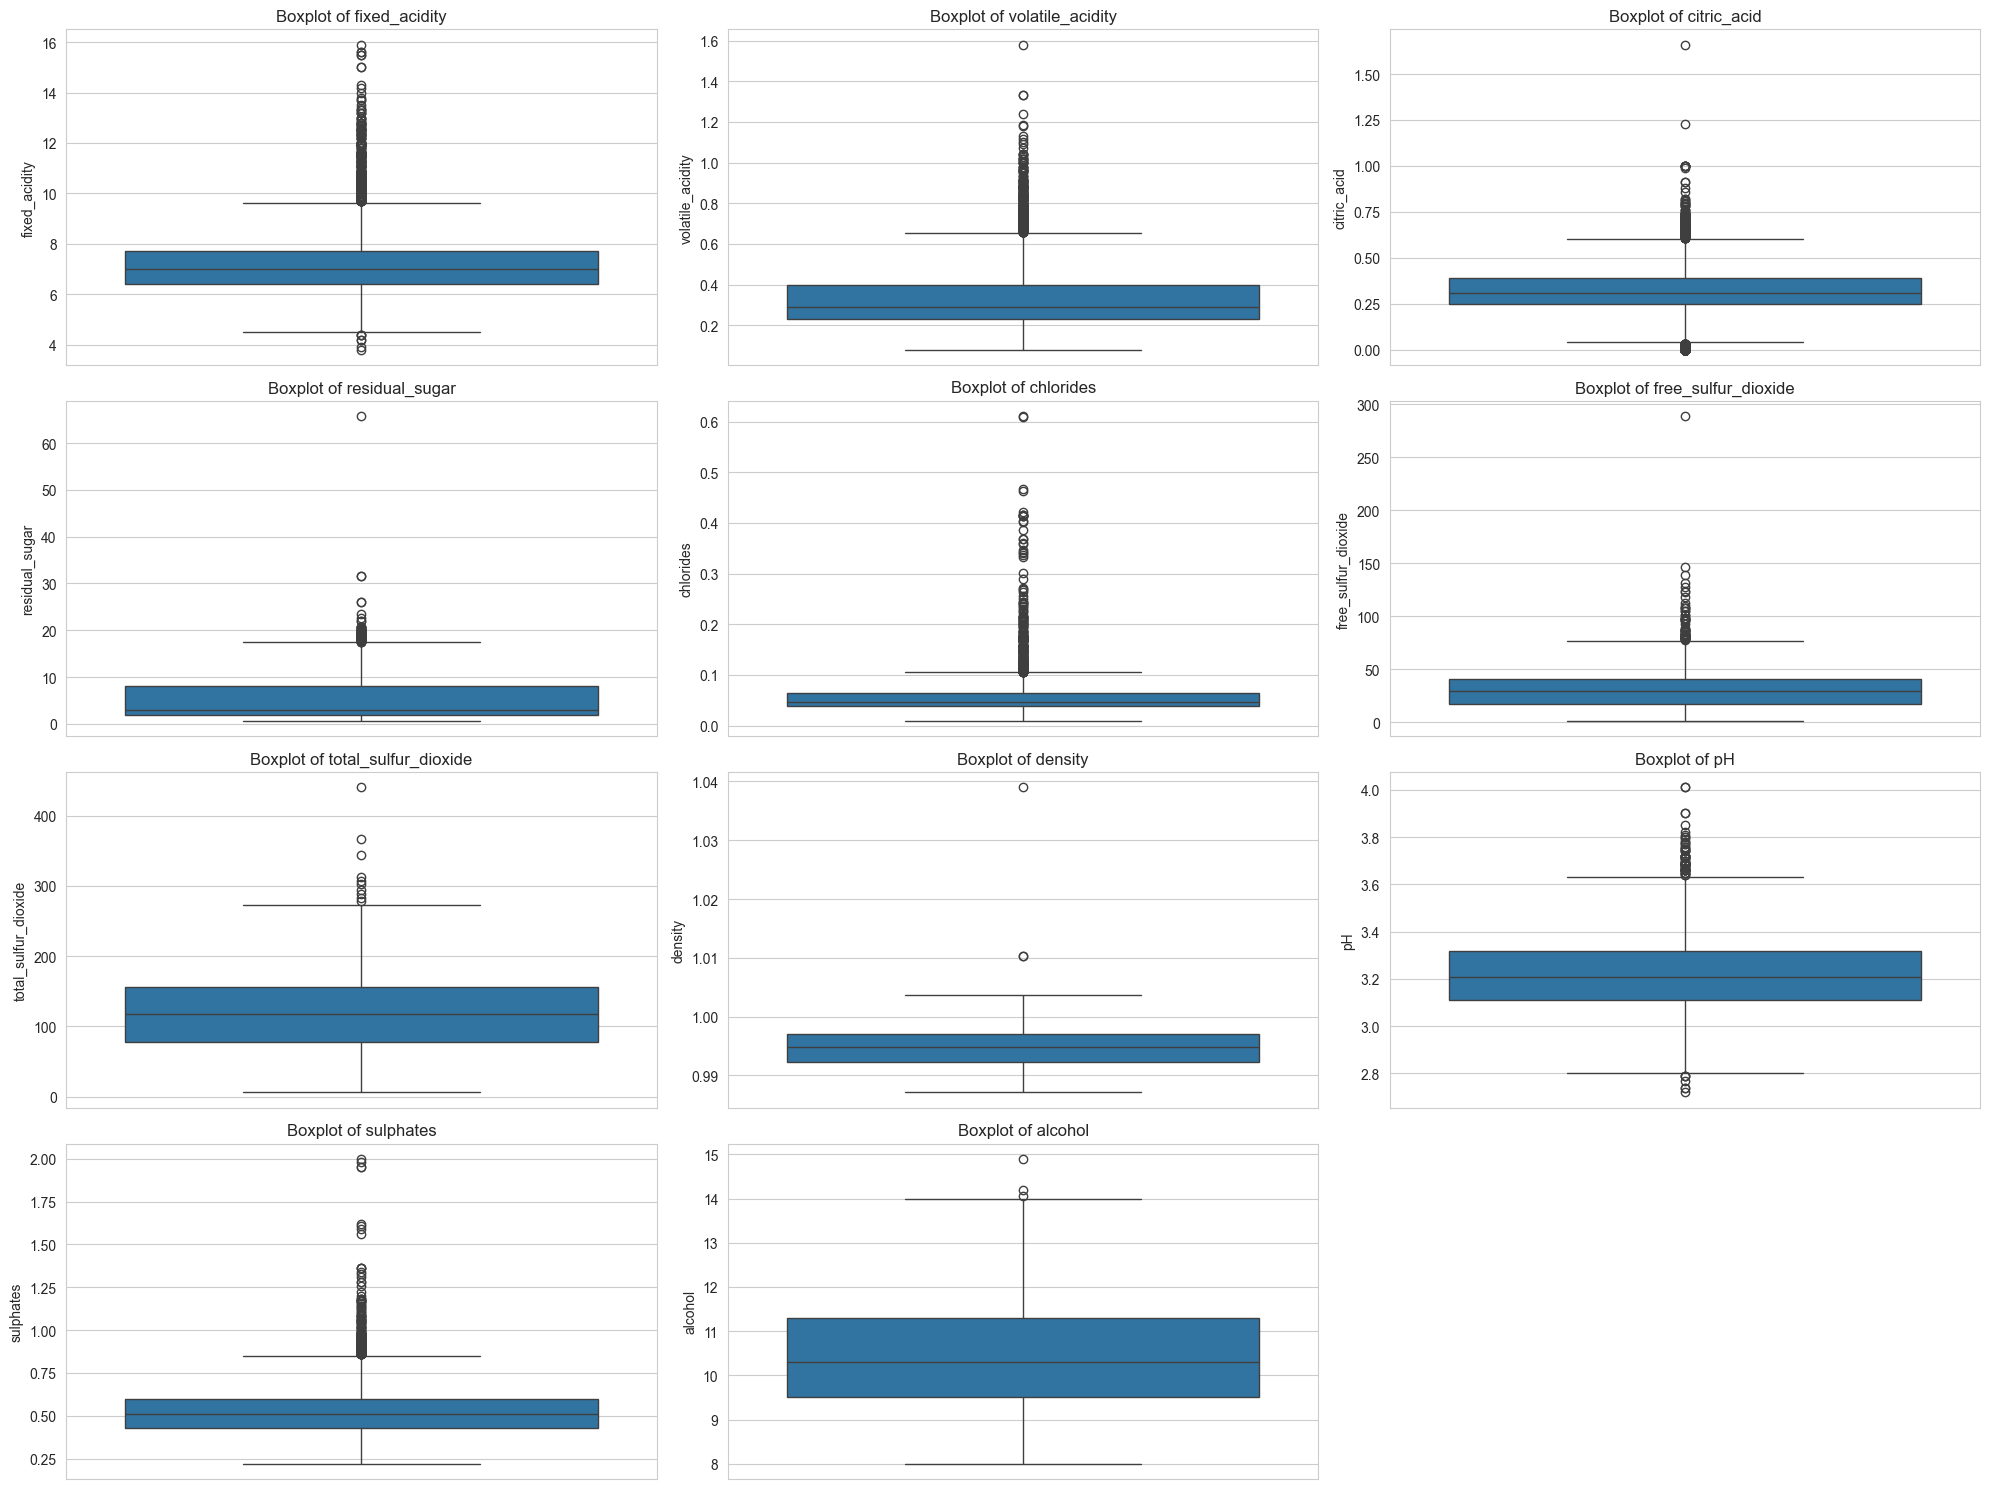

In [45]:
# Se visualizan los datos para identificar los valores atípicos.
plt.figure(figsize=(20, 15))
for i, column in enumerate(df_wine.columns[:-1][:11], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df_wine, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [46]:
# Se eliminan los valores atípicos de las variables.
for column in df_wine.columns[:-1][:11]:
    q1 = df_wine[column].quantile(0.25)
    q3 = df_wine[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_wine = df_wine[(df_wine[column] > lower_bound) & (df_wine[column] < upper_bound)]
    

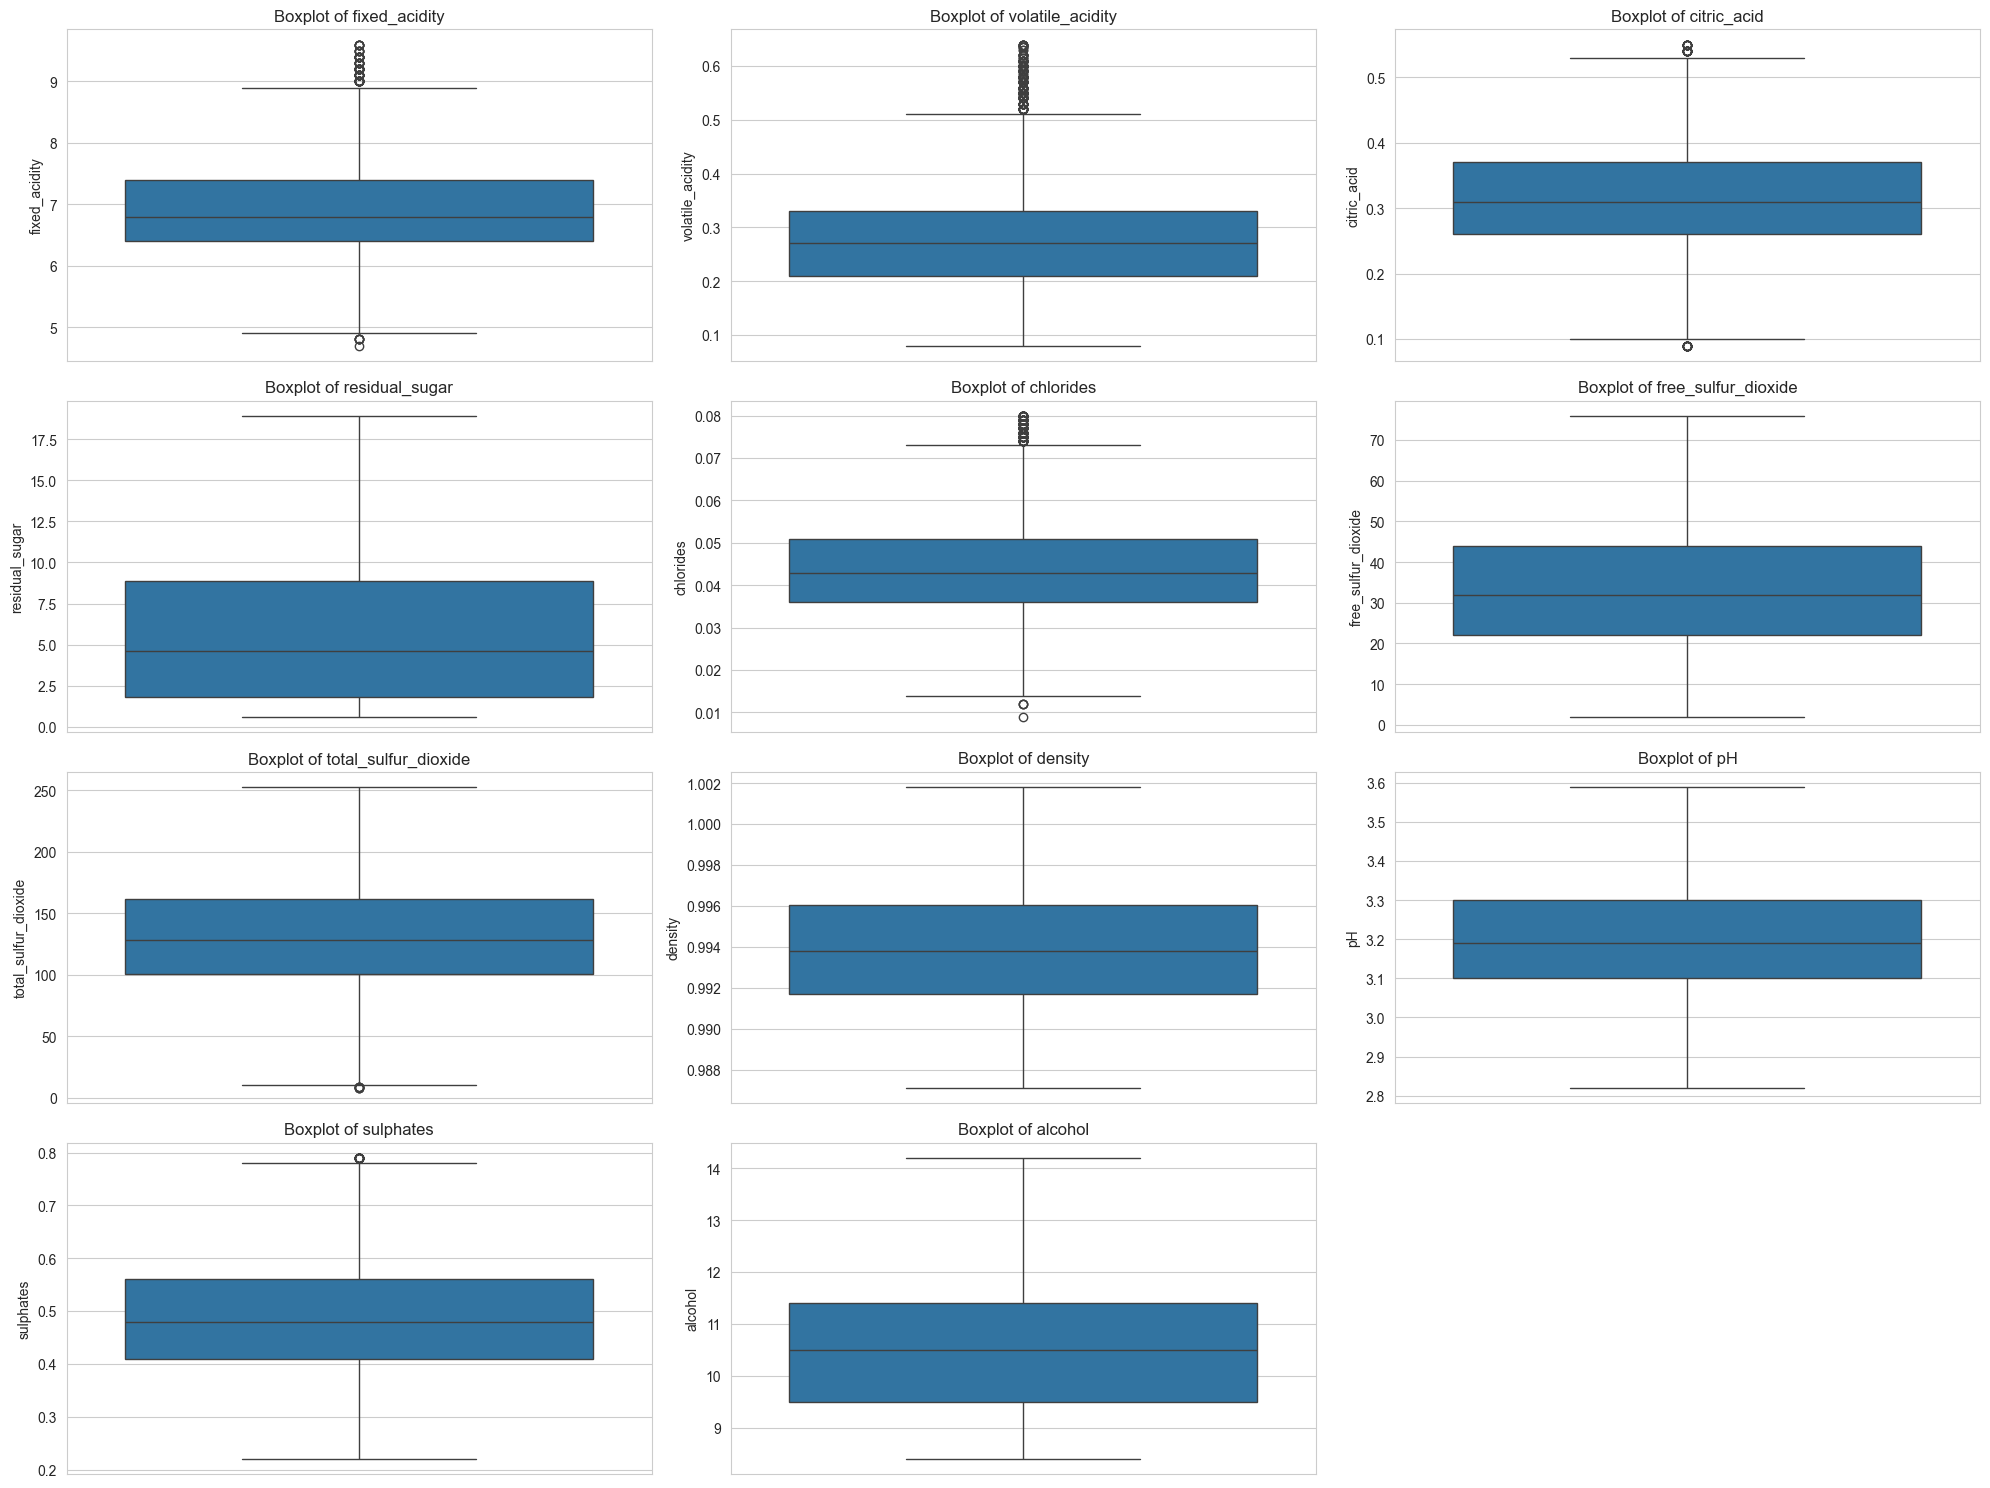

In [47]:
# Se visualizan los datos después de eliminar los valores atípicos.
plt.figure(figsize=(20, 15))
for i, column in enumerate(df_wine.columns[:-1][:11], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df_wine, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

### Separación de variables dependientes e independientes

In [48]:
from keras.src.utils import to_categorical

# Dividir el dataset en conjunto de entrenamiento y conjunto de pruebas (80-20)
# df_wine.drop(columns=['color_red', 'color_white'], inplace=True)
y_data = df_wine['quality']
y_data = to_categorical(y_data)
X_data = df_wine.drop(columns=['quality'])
X_data = StandardScaler().fit_transform(X_data)

# 
x_data_train1_scaled, x_data_test1_scaled, y_data_train1, y_data_test1 = train_test_split(X_data, y_data, test_size=0.5, random_state=2)
x_data_train2_scaled, x_data_test2_scaled, y_data_train2, y_data_test2 = train_test_split(X_data, y_data, test_size=0.4, random_state=2)
x_data_train3_scaled, x_data_test3_scaled, y_data_train3, y_data_test3 = train_test_split(X_data, y_data, test_size=0.2, random_state=2)





# **Paso 4: Construcción del modelo**

### Modelo 1: Perceptrón

In [50]:
from keras import Sequential
from sklearn.linear_model import Perceptron
from keras.layers import Dense
def build_model_1():
    model = Sequential([
    Dense(units=y_data.shape[1], activation='elu')    
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), tf.keras.metrics.F1Score()])
    return model

    

### Modelo 2: Red neuronal con una capa oculta con un numero de neuronas igual al numero de entradas

In [51]:
y_data_train1.shape[1]

10

In [52]:
def build_model_2():
    model = tf.keras.models.Sequential()
    n_neurons = df_wine.shape[1] - 1
    model.add(tf.keras.layers.Dense(units=n_neurons, activation='sigmoid', use_bias=True))
    model.add(tf.keras.layers.Dense(units=y_data.shape[1], activation='sigmoid', use_bias=True))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), tf.keras.metrics.F1Score()])
    return model

### Modelo 3: Red neuronal con dos capas oculta con dos neuronas en cada capa oculta.

In [53]:
def build_model_3():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=2, activation='sigmoid', use_bias=True))
    model.add(tf.keras.layers.Dense(units=2, activation='sigmoid', use_bias=True))
    model.add(tf.keras.layers.Dense(units=y_data.shape[1], activation='sigmoid', use_bias=True))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), tf.keras.metrics.F1Score()])
    return model

# **Paso 5: Entrenamiento de los modelo**

### Modelo 1

In [54]:
model_1_1 = build_model_1()
model_1_1.fit(x_data_train1_scaled, y_data_train1, epochs=100, batch_size=32, validation_data=(x_data_test1_scaled, y_data_test1))

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.0777 - f1_score: 0.0424 - loss: 7.3630 - precision_2: 0.0999 - recall_2: 0.2904 - val_accuracy: 0.0760 - val_f1_score: 0.0433 - val_loss: 7.6035 - val_precision_2: 0.0957 - val_recall_2: 0.2743
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0800 - f1_score: 0.0436 - loss: 7.3912 - precision_2: 0.0984 - recall_2: 0.2786 - val_accuracy: 0.0835 - val_f1_score: 0.0465 - val_loss: 7.7163 - val_precision_2: 0.1017 - val_recall_2: 0.2857
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0966 - f1_score: 0.0517 - loss: 7.3341 - precision_2: 0.1061 - recall_2: 0.2941 - val_accuracy: 0.0936 - val_f1_score: 0.0516 - val_loss: 7.5313 - val_precision_2: 0.1071 - val_recall_2: 0.2910
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0880 - f1_score: 0.0485 - loss: 7.4141 - precision_2: 0.1080 - recall_2: 0.2888 - val_accuracy: 0.1029 - val_f1_score: 0.0550 - val_loss: 7.3597 - val_prec

In [55]:
model_1_2 = build_model_1()
model_1_2.fit(x_data_train2_scaled, y_data_train2, epochs=100, batch_size=32, validation_data=(x_data_test2_scaled, y_data_test2))

Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1065 - f1_score: 0.0559 - loss: 6.1918 - precision_3: 0.1093 - recall_3: 0.3456 - val_accuracy: 0.1275 - val_f1_score: 0.0707 - val_loss: 6.5281 - val_precision_3: 0.1151 - val_recall_3: 0.3418
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1280 - f1_score: 0.0642 - loss: 6.1783 - precision_3: 0.1200 - recall_3: 0.3489 - val_accuracy: 0.1374 - val_f1_score: 0.0733 - val_loss: 7.0601 - val_precision_3: 0.1230 - val_recall_3: 0.3451
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1345 - f1_score: 0.0642 - loss: 7.0160 - precision_3: 0.1294 - recall_3: 0.3626 - val_accuracy: 0.1500 - val_f1_score: 0.0780 - val_loss: 7.5912 - val_precision_3: 0.1290 - val_recall_3: 0.3462
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1448 - f1_score: 0.0666 - loss: 7.4871 - precision_3: 0.1430 - recall_3: 0.3876 - val_accuracy: 0.1555 - val_f1_score: 0.0782 - val_loss: 7.6987 - val_precisi

In [56]:
model_1_3 = build_model_1()
model_1_3.fit(x_data_train3_scaled, y_data_train3, epochs=100, batch_size=32, validation_data=(x_data_test3_scaled, y_data_test3))

Epoch 1/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0771 - f1_score: 0.0473 - loss: 9.1827 - precision_4: 0.0836 - recall_4: 0.2647 - val_accuracy: 0.0967 - val_f1_score: 0.0486 - val_loss: 8.9444 - val_precision_4: 0.0952 - val_recall_4: 0.2648
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0885 - f1_score: 0.0487 - loss: 8.5299 - precision_4: 0.0944 - recall_4: 0.2670 - val_accuracy: 0.1209 - val_f1_score: 0.0588 - val_loss: 8.6463 - val_precision_4: 0.1094 - val_recall_4: 0.2747
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1081 - f1_score: 0.0542 - loss: 8.2168 - precision_4: 0.1078 - recall_4: 0.2744 - val_accuracy: 0.1484 - val_f1_score: 0.0729 - val_loss: 8.7603 - val_precision_4: 0.1294 - val_recall_4: 0.2813
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1333 - f1_score: 0.0634 - loss: 8.1559 - precision_4: 0.1234 - recall_4: 0.2750 - val_accuracy: 0.1418 - val_f1_score: 0.0697 - val_loss: 8.4776 - val

### Modelo 2

In [57]:
model_2_1 = build_model_2()
model_2_1.fit(x_data_train1_scaled, y_data_train1, epochs=100, batch_size=32, validation_data=(x_data_test1_scaled, y_data_test1))

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1104 - f1_score: 0.0358 - loss: 2.1629 - precision_5: 0.1355 - recall_5: 0.8610 - val_accuracy: 0.4097 - val_f1_score: 0.0936 - val_loss: 1.7583 - val_precision_5: 0.1892 - val_recall_5: 0.9903
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4288 - f1_score: 0.0955 - loss: 1.6716 - precision_5: 0.2016 - recall_5: 0.9882 - val_accuracy: 0.4615 - val_f1_score: 0.1019 - val_loss: 1.4779 - val_precision_5: 0.2388 - val_recall_5: 0.9648
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4765 - f1_score: 0.1026 - loss: 1.4432 - precision_5: 0.2509 - recall_5: 0.9570 - val_accuracy: 0.4769 - val_f1_score: 0.0996 - val_loss: 1.3490 - val_precision_5: 0.2876 - val_recall_5: 0.9433
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4867 - f1_score: 0.0969 - loss: 1.3223 - precision_5: 0.2979 - recall_5: 0.9452 - val_accuracy: 0.4747 - val_f1_score: 0.0948 - val_loss: 1.2846 - val_precisi

In [58]:
model_2_2 = build_model_2()
model_2_2.fit(x_data_train2_scaled, y_data_train2, epochs=100, batch_size=32, validation_data=(x_data_test2_scaled, y_data_test2))

Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1094 - f1_score: 0.0478 - loss: 2.0521 - precision_6: 0.1606 - recall_6: 0.9398 - val_accuracy: 0.4467 - val_f1_score: 0.0988 - val_loss: 1.6484 - val_precision_6: 0.2229 - val_recall_6: 0.9467
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4453 - f1_score: 0.0933 - loss: 1.5854 - precision_6: 0.2379 - recall_6: 0.9346 - val_accuracy: 0.4681 - val_f1_score: 0.0950 - val_loss: 1.4152 - val_precision_6: 0.3033 - val_recall_6: 0.9335
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4869 - f1_score: 0.0966 - loss: 1.3832 - precision_6: 0.3076 - recall_6: 0.9320 - val_accuracy: 0.4698 - val_f1_score: 0.0921 - val_loss: 1.3198 - val_precision_6: 0.3110 - val_recall_6: 0.9330
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5083 - f1_score: 0.0981 - loss: 1.2831 - precision_6: 0.3111 - recall_6: 0.9333 - val_accuracy: 0.4753 - val_f1_score: 0.0951 - val_loss: 1.2708 - val_precisi

In [59]:
model_2_3 = build_model_2()
model_2_3.fit(x_data_train3_scaled, y_data_train3, epochs=100, batch_size=32, validation_data=(x_data_test3_scaled, y_data_test3))

Epoch 1/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4069 - f1_score: 0.0623 - loss: 2.1136 - precision_7: 0.1245 - recall_7: 0.7254 - val_accuracy: 0.4582 - val_f1_score: 0.0691 - val_loss: 1.5850 - val_precision_7: 0.2752 - val_recall_7: 0.9099
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4557 - f1_score: 0.0680 - loss: 1.5465 - precision_7: 0.2942 - recall_7: 0.9072 - val_accuracy: 0.4670 - val_f1_score: 0.0761 - val_loss: 1.3258 - val_precision_7: 0.3164 - val_recall_7: 0.9495
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4599 - f1_score: 0.0797 - loss: 1.3528 - precision_7: 0.3097 - recall_7: 0.9273 - val_accuracy: 0.4780 - val_f1_score: 0.0890 - val_loss: 1.2276 - val_precision_7: 0.3165 - val_recall_7: 0.9495
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4779 - f1_score: 0.0934 - loss: 1.2684 - precision_7: 0.3099 - recall_7: 0.9292 - val_accuracy: 0.4923 - val_f1_score: 0.1125 - val_loss: 1.1794 - val

### Modelo 3

In [60]:
model_3_1 = build_model_3()
model_3_1.fit(x_data_train1_scaled, y_data_train1, epochs=100, batch_size=32, validation_data=(x_data_test1_scaled, y_data_test1))

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0255 - f1_score: 0.0050 - loss: 2.1237 - precision_8: 0.1663 - recall_8: 0.9975 - val_accuracy: 0.1121 - val_f1_score: 0.0334 - val_loss: 1.9983 - val_precision_8: 0.1666 - val_recall_8: 0.9996
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4077 - f1_score: 0.0688 - loss: 1.9525 - precision_8: 0.1827 - recall_8: 0.9942 - val_accuracy: 0.4444 - val_f1_score: 0.0615 - val_loss: 1.8464 - val_precision_8: 0.2395 - val_recall_8: 0.9587
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4533 - f1_score: 0.0623 - loss: 1.8048 - precision_8: 0.2412 - recall_8: 0.9648 - val_accuracy: 0.4444 - val_f1_score: 0.0615 - val_loss: 1.7170 - val_precision_8: 0.2397 - val_recall_8: 0.9587
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4636 - f1_score: 0.0633 - loss: 1.6803 - precision_8: 0.2411 - recall_8: 0.9644 - val_accuracy: 0.4444 - val_f1_score: 0.0615 - val_loss: 1.6107 - val_precisi

In [61]:
model_3_2 = build_model_3()
model_3_2.fit(x_data_train2_scaled, y_data_train2, epochs=100, batch_size=32, validation_data=(x_data_test2_scaled, y_data_test2))

Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0090 - f1_score: 0.0031 - loss: 2.2547 - precision_9: 0.1564 - recall_9: 0.4929 - val_accuracy: 0.4418 - val_f1_score: 0.0613 - val_loss: 2.0880 - val_precision_9: 0.1592 - val_recall_9: 0.6368
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4757 - f1_score: 0.0645 - loss: 2.0277 - precision_9: 0.1854 - recall_9: 0.8842 - val_accuracy: 0.4418 - val_f1_score: 0.0613 - val_loss: 1.9032 - val_precision_9: 0.1871 - val_recall_9: 0.9357
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4662 - f1_score: 0.0636 - loss: 1.8511 - precision_9: 0.1884 - recall_9: 0.9377 - val_accuracy: 0.4418 - val_f1_score: 0.0613 - val_loss: 1.7583 - val_precision_9: 0.2617 - val_recall_9: 0.9330
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4635 - f1_score: 0.0633 - loss: 1.7112 - precision_9: 0.2991 - recall_9: 0.9385 - val_accuracy: 0.4418 - val_f1_score: 0.0613 - val_loss: 1.6465 - val_precisi

In [62]:
model_3_3 = build_model_3()
model_3_3.fit(x_data_train3_scaled, y_data_train3, epochs=100, batch_size=32, validation_data=(x_data_test3_scaled, y_data_test3))

Epoch 1/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0452 - f1_score: 0.0153 - loss: 2.3841 - precision_10: 0.0461 - recall_10: 0.0657 - val_accuracy: 0.1879 - val_f1_score: 0.0316 - val_loss: 2.1675 - val_precision_10: 0.2473 - val_recall_10: 0.4945
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1948 - f1_score: 0.0419 - loss: 2.1174 - precision_10: 0.2361 - recall_10: 0.4735 - val_accuracy: 0.3066 - val_f1_score: 0.0469 - val_loss: 1.9396 - val_precision_10: 0.2994 - val_recall_10: 0.8143
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2905 - f1_score: 0.0450 - loss: 1.9065 - precision_10: 0.3079 - recall_10: 0.9113 - val_accuracy: 0.3066 - val_f1_score: 0.0469 - val_loss: 1.7528 - val_precision_10: 0.3165 - val_recall_10: 0.9495
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2821 - f1_score: 0.0440 - loss: 1.7404 - precision_10: 0.3094 - recall_10: 0.9283 - val_accuracy: 0.3066 - val_f1_score: 0.0469 - val_loss